### <span style='color:lightgreen;'>การปรับสมดุลฮิสโตแกรม (Histogram Equalization)</span>
<b>การปรับสมดุลฮิสโตแกรม</b> เป็นเทคนิคที่ใช้ในการปรับปรุงความคมชัดของภาพโดยการกระจายค่าความเข้มแสงของภาพใหม่ แนวคิดพื้นฐานคือการกระจายค่าความเข้มแสงที่พบบ่อยที่สุดออกไป เพื่อให้ฮิสโตแกรมของภาพผลลัพธ์แบนราบขึ้น ซึ่งจะช่วยเพิ่มความคมชัดโดยรวม

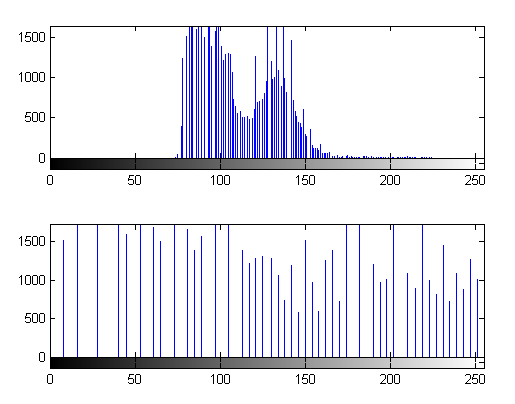


คำอธิบายละเอียดเพิ่มเติม:




#### <span style='color:lightblue;'>คำแนะนำทีละขั้นตอน</span>  
1. **<span style='color:lightgreen;'>อ่านภาพ:</span>**
    - ขั้นตอนแรกคือการคำนวณฮิสโตแกรมของภาพ ฮิสโตแกรมแสดงถึงความถี่ของแต่ละระดับความเข้มแสงในภาพ

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [6]:
def ShowImage(img):
    plt.axis("off")
    plt.imshow(img, cmap='gray')
    plt.show()

In [7]:
gamma = 0.5
c = 255.0

In [8]:
img = cv2.imread('./images/cameraman.png', 0)
img_norm = img.astype(np.float16)
print(np.amin(img_norm), np.amax(img_norm))
img_norm = img_norm/np.amax(img_norm) 
print(np.amax(img_norm))

0.0 255.0
1.0


In [9]:
gamma_img = (img_norm**gamma)*c
gamma_img = gamma_img.astype(np.uint8) 
print(np.amin(gamma_img), np.amax(gamma_img))


0 255


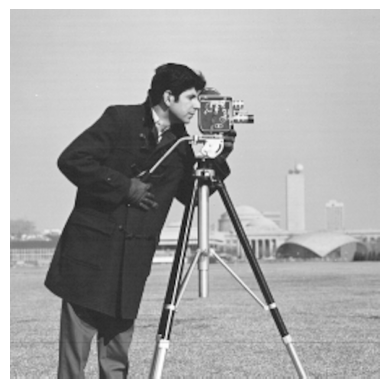

In [10]:
muls = cv2.hconcat([img, gamma_img])
ShowImage(gamma_img)

In [11]:
hist_0 = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_1 = cv2.calcHist([gamma_img], [0], None, [256], [0, 256])
print(hist_0.shape, hist_1.shape ) #(256, 1) 256 ความเข้มของภาพ 1 คือแถวของภาพ -แถว,คอลัมน์

(256, 1) (256, 1)


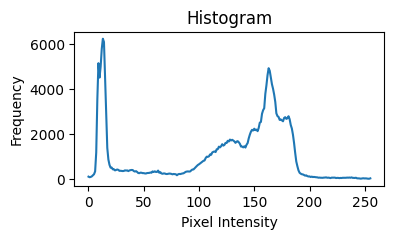

In [12]:
plt.figure(figsize=(4,2))
plt.plot(hist_0)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()
# plt.savefig('

2. **<span style='color:lightgreen;'>การคำนวณฮิสโตแกรม:</span>**
    - ขั้นตอนแรกคือการคำนวณฮิสโตแกรมของภาพ ฮิสโตแกรมแสดงถึงความถี่ของแต่ละระดับความเข้มแสงในภาพ

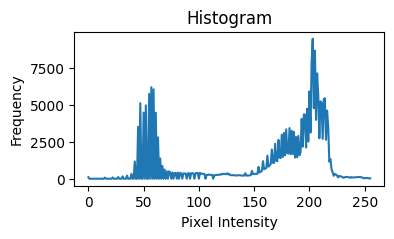

In [13]:
plt.figure(figsize=(4,2))
plt.plot(hist_1)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()
# plt.savefig('

In [14]:
hist, bins = np.histogram(gamma_img.flatten(), 256, [0,256]) #256 ความเข้มของภาพ แปลงเป็น vector
print(hist.shape)

(256,)


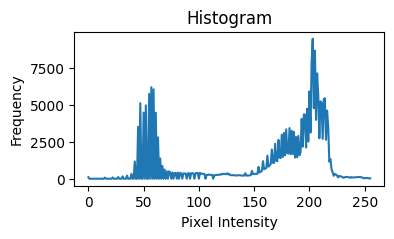

In [15]:
plt.figure(figsize=(4,2))
plt.plot(hist)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

3. **<span style='color:lightgreen;'>ฟังก์ชันการแจกแจงสะสม (Cumulative Distribution Function - CDF):</span>**
    - ฟังก์ชันการแจกแจงสะสมจะถูกคำนวณจากฮิสโตแกรม CDF คือผลรวมสะสมของค่าฮิสโตแกรม ซึ่งช่วยในการแมปค่าพิกเซลเดิมไปยังค่าความเข้มแสงใหม่โดยอิงจากความน่าจะเป็นสะสม

In [16]:
cdf = hist.cumsum()

In [17]:
cdf1 = np.array([0]*256,dtype='int')

In [18]:
n = hist.shape
print(n)

(256,)


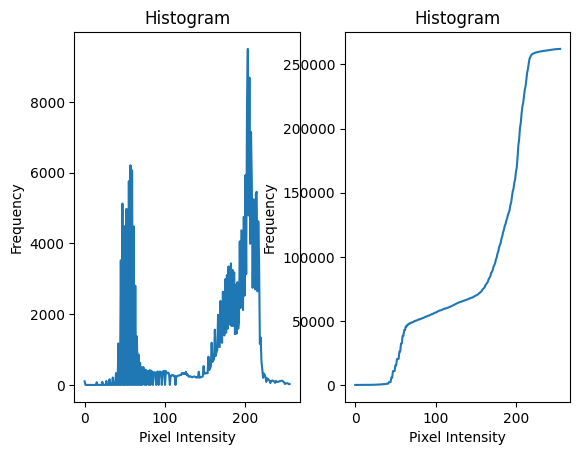

In [19]:
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.plot(hist)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

fig.add_subplot(1, 2, 2)
plt.plot(cdf)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.show()

4. **<span style='color:lightgreen;'>การแมปค่าความเข้มแสง:</span>**
    - ค่าความเข้มแสงเดิมจะถูกแมปไปยังค่าความเข้มแสงใหม่โดยใช้ CDF เป้าหมายคือการกระจายค่าพิกเซลให้ครอบคลุมช่วงความเข้มแสงที่กว้างขึ้น

In [ ]:
# สร้าง CDF
cdf = hist.cumsum()  # [0, 100, 250, 400, ...]

# ซ่อนค่า 0
cdf_m = np.ma.masked_equal(cdf, 0)  # [-- 100, 250, 400, ...]

# Normalize (ค่า 0 ไม่ถูกนำมาพิจารณา)
cdf_m = ((cdf_m - cdf_m.min()) / (cdf_m.max() - cdf_m.min())) * 255

# แปลงกลับเป็น array ธรรมดา เติม 0 ที่ตำแหน่ง masked
cdf_m = np.ma.filled(cdf_m, 0).astype('uint8')


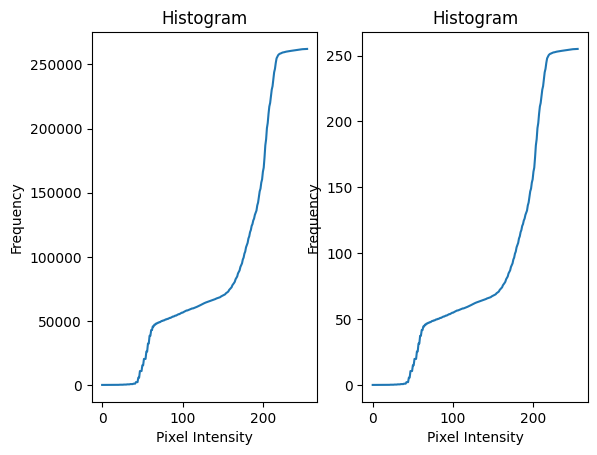

In [21]:
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.plot(cdf)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

fig.add_subplot(1, 2, 2)
plt.plot(cdf_m)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.show()

In [22]:

cdf_m = np.ma.filled(cdf_m, 0).astype('uint8')  

In [23]:
equalized_image = cdf_m[gamma_img]

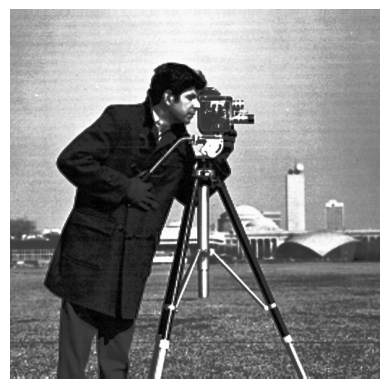

In [24]:
muls_0 = cv2.hconcat([img, equalized_image])
muls_1 = cv2.hconcat([gamma_img, equalized_image])
muls = cv2.vconcat([muls_0, muls_1])

ShowImage(equalized_image)

In [25]:
cv2.imshow("Results", equalized_image)
cv2.waitKey()
cv2.destroyAllWindows()

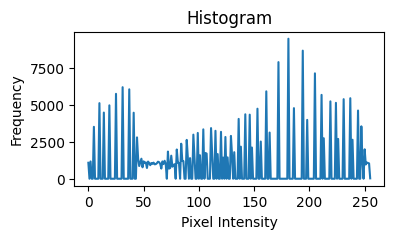

In [26]:
hist_equ, bins = np.histogram(equalized_image.flatten(), 256, [0,256])
plt.figure(figsize=(4,2))
plt.plot(hist_equ)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()